In [1]:
!pip install tensorflow
!pip install matplotlib

import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_data_dir = '/content/drive/MyDrive/archive (1)/train'
test_data_dir ='/content/drive/MyDrive/archive (1)/test'


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the target dimensions for your images
target_width, target_height = 224, 224

# Define batch size
batch_size = 32

# Create ImageDataGenerator for preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Rescale pixel values to [0, 1]
    shear_range=0.2,            # Random shear transformation
    zoom_range=0.2,             # Random zoom
    horizontal_flip=True,      # Random horizontal flip
    validation_split=0.2        # Splitting training data for validation
)

# Create ImageDataGenerator for testing (only rescaling, no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of training data
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (1)/train',            # Path to training images
    target_size=(target_width, target_height),
    batch_size=batch_size,
    class_mode='categorical',   # For multi-class classification
    subset='training'           # Training subset
)

# Generate batches of validation data
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (1)/train',            # Path to training images (same as above)
    target_size=(target_width, target_height),
    batch_size=batch_size,
    class_mode='categorical',   # For multi-class classification
    subset='validation'         # Validation subset
)

# Generate batches of testing data
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (1)/test',             # Path to test images
    target_size=(target_width, target_height),
    batch_size=batch_size,
    class_mode='categorical'    # For multi-class classification
)


Found 2039 images belonging to 2 classes.
Found 509 images belonging to 2 classes.
Found 308 images belonging to 2 classes.


In [15]:
import pandas as pd
train_df = pd.DataFrame({
    'train_generator': train_file_paths,
    'label': train_labels
})

test_df = pd.DataFrame({
  'test_generator': test_file_paths,
    'label': test_labels
})
print(train_df.head())
print(test_df.head())

NameError: name 'train_file_paths' is not defined

In [13]:
import keras
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

# Ensure keras.applications is installed
!pip install keras.applications

# Define image size
img_size = (224, 224)  # Example image size, modify as needed

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))  # Second dense layer
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))   # Third dense layer
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))   # Fourth dense layer
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1,000.0 kB/s eta 0:00:00
58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128

In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = len(train_generator.class_indices)

# Define your model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),  # Additional Convolutional Layer 1
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(512, (3, 3), activation='relu'),  # Additional Convolutional Layer 2
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(512, (3, 3), activation='relu'),  # Additional Convolutional Layer 3
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Print model summary to debug the shapes
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 26, 26, 128)      

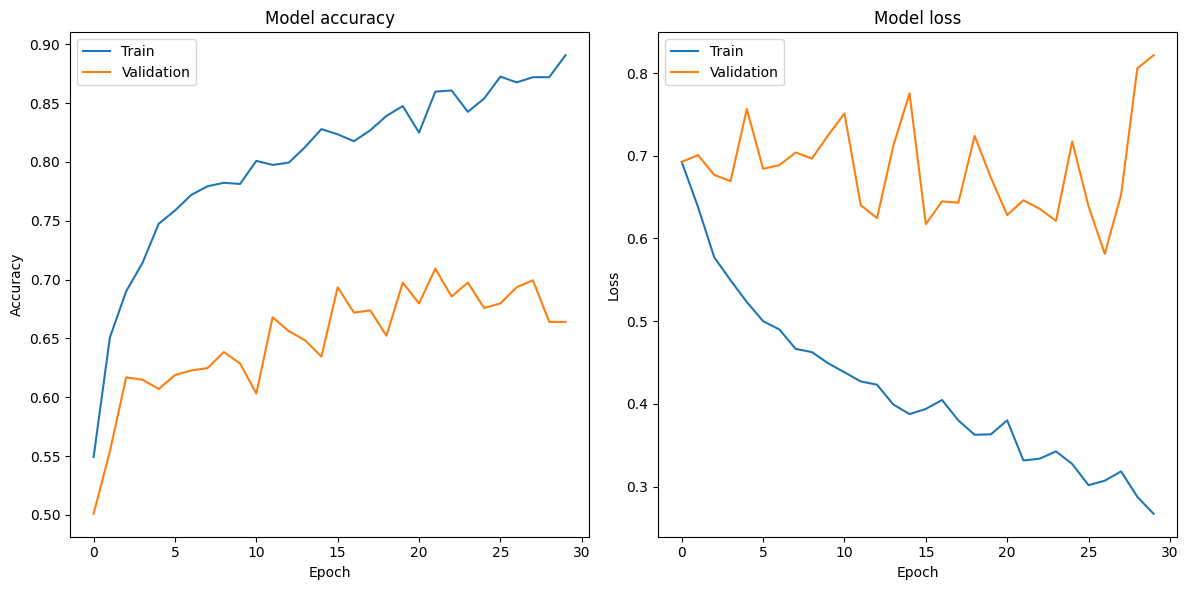

In [38]:
# Plot training & validation accuracy values

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [40]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path to the image you want to test
image_path = '/content/drive/MyDrive/Autistic Children Emotions/Test/fear/13.jpg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values to be between 0 and 1

# Make predictions
predictions = model.predict(img_array)

# Get the emotion label with the highest probability
emotion_labels = ['Surprise', 'Delight', 'Sadness', 'Fear', 'Joy', 'Anger']
predicted_emotion = emotion_labels[np.argmax(predictions)]

# Print the predicted emotion
print(f'The predicted emotion is: {predicted_emotion}')

1/1 [==============================] - 0s 122ms/step
The predicted emotion is: Surprise


In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculating accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Calculating classification report
target_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=target_names))

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Calculating F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f'F1 Score: {f1}')

10/10 [==============================] - 9s 881ms/step - loss: 0.5034 - accuracy: 0.7630
Test accuracy: 0.7629870176315308
10/10 [==============================] - 9s 869ms/step
Accuracy: 0.4837662337662338
Classification Report:
              precision    recall  f1-score   support

    autistic       0.48      0.61      0.54       150
non_autistic       0.50      0.36      0.42       158

    accuracy                           0.48       308
   macro avg       0.49      0.49      0.48       308
weighted avg       0.49      0.48      0.48       308

Confusion Matrix:
[[ 92  58]
 [101  57]]
F1 Score: 0.4754691372767174
